# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.488  1  1.091 0.298 0.006   
                             age        0.139  1  0.311 0.578 0.002   
                             Kiel       1.856  1  4.153 0.043 0.021   
                             Magdeburg  3.788  1  8.476 0.004 0.042   
                             Sweden     6.752  1 15.107 0.000 0.073   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.274  1  0.270 0.604 0.001   
                             age        0.485  1  0.479 0.490 0.002   
                             Kiel       0.055  1  0.055 0.816 0.000   
                             Magdeburg  2.379  1  2.347 0.127 0.012   
                             Sweden    14.413  1 14.216 0.000 0.069   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.526  0.463    False  
                             age               0.238  0.715    False  
                             Kiel              1.367  0.108    False  
                             Magdeburg         2.395  0.016     True  
                             Sweden            3.854  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.219  0.736    False  
                             age               0.310  0.645    False  
                             Kiel              0.089  0.889    False  
                             Magdeburg         0.896  0.252    False  
                             Sweden            3.663  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.632  1  3.992 0.047 0.020   
                             age        0.013  1  0.084 0.772 0.000   
                             Kiel       0.423  1  2.668 0.104 0.014   
                             Magdeburg  0.971  1  6.129 0.014 0.031   
                             Sweden     2.512  1 15.859 0.000 0.077   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.749  1  1.984 0.161 0.010   
                             age        1.225  1  0.648 0.422 0.003   
                             Kiel       8.954  1  4.737 0.031 0.024   
                             Magdeburg 14.883  1  7.874 0.006 0.040   
                             Sweden     0.251  1  0.133 0.716 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.327  0.108    False  
                             age               0.112  0.851    False  
                             Kiel              0.983  0.203    False  
                             Magdeburg         1.849  0.041     True  
                             Sweden            4.013  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.794  0.282    False  
                             age               0.375  0.569    False  
                             Kiel              1.512  0.077    False  
                             Magdeburg         2.257  0.019     True  
                             Sweden            0.145  0.810    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.298         0.526  0.463    False   
                             Kiel      0.043         1.367  0.108    False   
                             Magdeburg 0.004         2.395  0.016     True   
                             Sweden    0.000         3.854  0.001     True   
                             age       0.578         0.238  0.715    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.604         0.219  0.736    False   
                             Kiel      0.816         0.089  0.889    False   
                             Magdeburg 0.127         0.896  0.252    False   
                             Sweden    0.000         3.663  0.001     True   
                             age       0.490         0.310  0.645    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.047         1.327  0.108    False  
                             Kiel      0.104         0.983  0.203    False  
                             Magdeburg 0.014         1.849  0.041     True  
                             Sweden    0.000         4.013  0.001     True  
                             age       0.772         0.112  0.851    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.161         0.794  0.282    False  
                             Kiel      0.031         1.512  0.077    False  
                             Magdeburg 0.006         2.257  0.019     True  
                             Sweden    0.716         0.145  0.810    False  
                             age       0.422         0.375  0.569    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.262         2.481     0.339     0.245         2.744     0.311
std       0.303         5.357     0.331     0.298         5.177     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.330     0.015     0.002         0.359     0.008
50%       0.124         0.908     0.247     0.093         1.034     0.185
75%       0.468         2.416     0.624     0.438         2.685     0.584
max       1.000       147.403     1.000     1.000        86.790     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_34946/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.298         0.526   
A0A024R0T9;K7ER74;P02655                           AD     0.072         1.144   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.071         1.148   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.471         0.327   
A0A075B6H7                                         AD     0.154         0.813   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.041         1.387   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.435         0.361   
S4R3U6                                             AD     0.604         0.219   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.463    False   
A0A024R0T9;K7ER74;P02655                           AD      0.163    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.162    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.627    False   
A0A075B6H7                                         AD      0.289    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.104    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.595    False   
S4R3U6                                             AD      0.736    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.047         1.327   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.492   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.272         0.566   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.296         0.528   
A0A075B6H7                                         AD     0.412         0.385   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.041         1.388   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.975         0.011   
S4R3U6                                             AD     0.161         0.794   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.108    False  
A0A024R0T9;K7ER74;P02655                           AD      0.080    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.416    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.445    False  
A0A075B6H7                                         AD      0.560    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.399     0.337     0.245         1.488     0.319
std       0.288         1.639     0.315     0.285         1.783     0.311
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.012         0.360     0.040     0.010         0.363     0.030
50%       0.125         0.904     0.249     0.112         0.950     0.216
75%       0.437         1.911     0.596     0.434         2.022     0.580
max       0.997        23.176     0.998     0.998        26.252     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1038,998


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.298         0.526  0.463   
A0A024R0T9;K7ER74;P02655                           0.072         1.144  0.163   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.071         1.148  0.162   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.471         0.327  0.627   
A0A075B6H7                                         0.154         0.813  0.289   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.041         1.387  0.104   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.435         0.361  0.595   
S4R3U6                                             0.604         0.219  0.736   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.047   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.272   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.296   
A0A075B6H7                                            False 0.412   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.041   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.975   
S4R3U6                                                False 0.161   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.327  0.108   
A0A024R0T9;K7ER74;P02655                                   1.492  0.080   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.566  0.416   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.528  0.445   
A0A075B6H7                                                 0.385  0.560   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.388  0.096   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.011  0.986   
S4R3U6                                                     0.794  0.282   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    970
PI (yes) - QRILC (yes)   355
PI (no)  - QRILC (yes)    68
PI (yes) - QRILC (no)     28
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_34946/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A075B6I0                                         0.028         1.548  0.078   
A0A075B6J9                                         0.065         1.185  0.152   
A0A087WWT2;Q9NPD7                                  0.036         1.445  0.094   
A0A087X0M8                                         0.036         1.440  0.095   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A... 0.008         2.084  0.029   
...                                                  ...           ...    ...   
Q9NY15                                             0.307         0.513  0.473   
Q9NYX4                                             0.040         1.397  0.102   
Q9P0K9                                             0.031         1.510  0.084   
Q9UJ14                                             0.010         2.004  0.033   
Q9UQ52                                             0.206         0.686  0.354   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A075B6I0                                            False 0.003   
A0A075B6J9                                            False 0.004   
A0A087WWT2;Q9NPD7                                     False 0.005   
A0A087X0M8                                            False 0.005   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...     True 0.020   
...                                                     ...   ...   
Q9NY15                                                False 0.008   
Q9NYX4                                                False 0.006   
Q9P0K9                                                False 0.009   
Q9UJ14                                                 True 0.059   
Q9UQ52                                                False 0.008   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6I0                                                 2.588  0.010   
A0A075B6J9                                                 2.370  0.015   
A0A087WWT2;Q9NPD7                                          2.328  0.016   
A0A087X0M8                                                 2.293  0.018   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...         1.706  0.054   
...                                                          ...    ...   
Q9NY15                                                     2.106  0.025   
Q9NYX4                                                     2.192  0.022   
Q9P0K9                                                     2.043  0.029   
Q9UJ14                                                     1.232  0.128   
Q9UQ52                                                     2.099  0.026   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A075B6I0                                             True       194  
A0A075B6J9                                             True       156  
A0A087WWT2;Q9NPD7                                      True       193  
A0A087X0M8                                             True       189  
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...    False       166  
...                                                     ...       ...  
Q9NY15                                                 True       135  
Q9NYX4                                                 True       195  
Q9P0K9                                                 True       192  
Q9UJ14                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.463,0.108,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.163,0.080,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.162,0.416,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.627,0.445,196,PI (no) - QRILC (no)
A0A075B6H7,0.289,0.560,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.104,0.096,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P43004;P43004-2;P43004-3,0.825,0.003,89,PI (no) - QRILC (yes),0.823
J3KSJ8;Q9UD71;Q9UD71-2,0.669,0.010,51,PI (no) - QRILC (yes),0.659
A8MXB9;J3KQJ1;Q8NBJ7,0.661,0.045,83,PI (no) - QRILC (yes),0.616
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.604,0.026,86,PI (no) - QRILC (yes),0.578
G3V295;G3V3I1;G3V5Z7;P60900,0.487,0.003,95,PI (no) - QRILC (yes),0.484
...,...,...,...,...,...
Q8WYK1,0.041,0.056,109,PI (yes) - QRILC (no),0.015
Q93063;Q93063-3,0.041,0.051,145,PI (yes) - QRILC (no),0.010
P00740;P00740-2,0.053,0.049,197,PI (no) - QRILC (yes),0.004


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


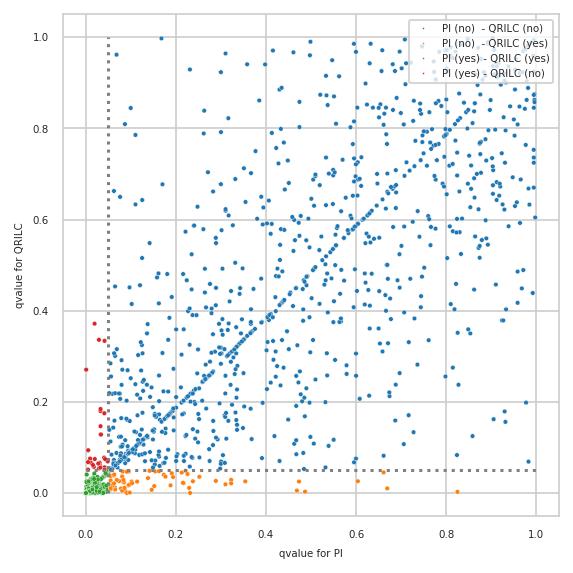

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


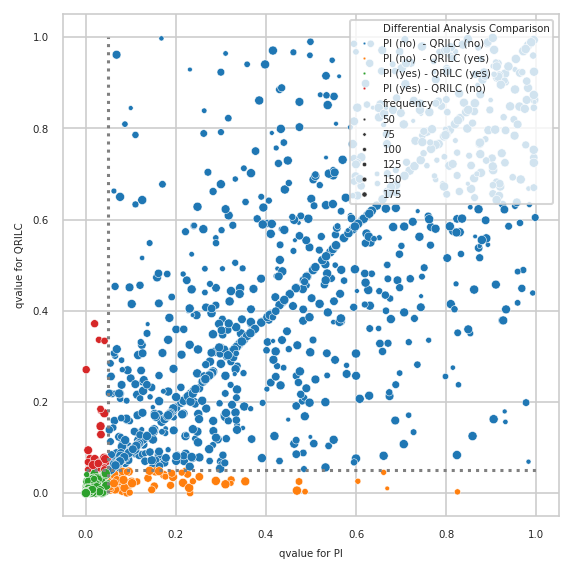

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APP,ENSP00000284981,5.000
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
MAPT,ENSP00000340820,4.800
...,...,...
MRPL1,ENSP00000315017,0.681
AASS,ENSP00000403768,0.681
MOB4,ENSP00000315702,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out